In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim

import torchvision
from matplotlib import pyplot as plt

In [2]:
def plot_curve(data):
    fig = plt.figure()
    plt.plot(range(len(data)), data, color='blue')
    plt.legend(['value'], loc='upper right')
    plt.xlabel('step')
    plt.ylabel('value')
    plt.show()

In [3]:
def plot_image(img, label, name):
    fig = plt.figure()
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.tight_layout()
        plt.imshow(img[i][0] * 0.3081 + 0.1307, cmap='gray', interpolation='none')
        plt.title("{}: {}".format(name, label[i].item()))
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [4]:
def one_hot(label, depth=10):
    out = torch.zeros(label.size(0), depth)
    idx = torch.LongTensor(label).view(-1, 1)
    out.scatter_(dim=1, index=idx, value=1)
    return out

In [5]:
batch_size = 512

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('mnist_data', train=True, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,))
                               ])),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('mnist_data/', train=False, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,))
                               ])),
    batch_size=batch_size, shuffle=False)

C:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
x, y = next(iter(train_loader))
print(x.shape, y.shape, x.min(), x.max())

torch.Size([512, 1, 28, 28]) torch.Size([512]) tensor(-0.4242) tensor(2.8215)


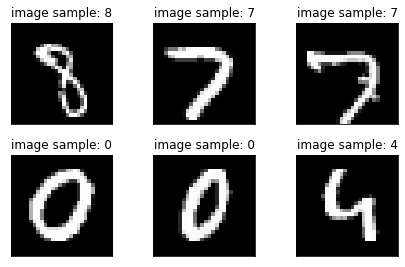

In [7]:
plot_image(x, y, 'image sample')

In [8]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        # xw+b
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # x: [b, 1, 28, 28]
        # h1 = relu(xw1+b1)
        x = F.relu(self.fc1(x))
        # h2 = relu(h1w2+b2)
        x = F.relu(self.fc2(x))
        # h3 = h2w3+b3
        x = self.fc3(x)

        return x

In [9]:
net = Net()

In [10]:
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

train_loss = []

0 0 0.13228660821914673
0 10 0.10104187577962875
0 20 0.0834331065416336
0 30 0.075982466340065
0 40 0.07028079032897949
0 50 0.06532739102840424
0 60 0.06318818777799606
0 70 0.0591609850525856
0 80 0.055250197649002075
0 90 0.05316408351063728
0 100 0.054241906851530075
0 110 0.050314925611019135
1 0 0.047592367976903915
1 10 0.04628021642565727
1 20 0.04733939841389656
1 30 0.04695974662899971
1 40 0.04369156435132027
1 50 0.041837889701128006
1 60 0.04349067062139511
1 70 0.04220571368932724
1 80 0.040206413716077805
1 90 0.03899034857749939
1 100 0.038752391934394836
1 110 0.03758590668439865
2 0 0.039271511137485504
2 10 0.03912351652979851
2 20 0.035014670342206955
2 30 0.0369352325797081
2 40 0.03723308816552162
2 50 0.035397086292505264
2 60 0.03406180813908577
2 70 0.03299037367105484
2 80 0.033822618424892426
2 90 0.03364294394850731
2 100 0.030570685863494873
2 110 0.03487028554081917


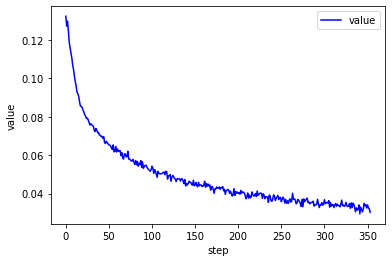

In [11]:
for epoch in range(3):

    for batch_idx, (x, y) in enumerate(train_loader):

        # x: [b, 1, 28, 28], y: [512]
        # [b, 1, 28, 28] => [b, 784]
        x = x.view(x.size(0), 28 * 28)
        # => [b, 10]
        out = net(x)
        # [b, 10]
        y_onehot = one_hot(y)
        # loss = mse(out, y_onehot)
        loss = F.mse_loss(out, y_onehot)

        optimizer.zero_grad()
        loss.backward()
        # w' = w - lr*grad
        optimizer.step()

        train_loss.append(loss.item())

        if batch_idx % 10 == 0:
            print(epoch, batch_idx, loss.item())

plot_curve(train_loss)

In [12]:
total_correct = 0
for x, y in test_loader:
    x = x.view(x.size(0), 28 * 28)
    out = net(x)
    # out: [b, 10] => pred: [b]
    pred = out.argmax(dim=1)
    correct = pred.eq(y).sum().float().item()
    total_correct += correct

total_num = len(test_loader.dataset)
acc = total_correct / total_num
print('test acc:', acc)

test acc: 0.8909


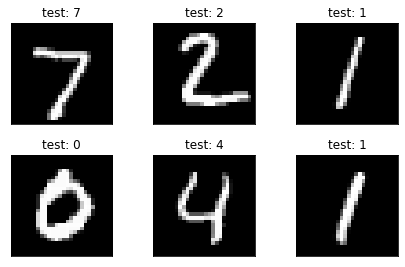

In [13]:
x, y = next(iter(test_loader))
out = net(x.view(x.size(0), 28 * 28))
pred = out.argmax(dim=1)
plot_image(x, pred, 'test')

In [14]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
import torchvision
from matplotlib import pyplot as plt
# from utils import plot_image, plot_curve, one_hot

In [15]:
batch_size = 512

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('mnist_data',
                               train=True,
                               download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,)
                                   )
                               ])),
    batch_size=batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('mnist_data/',
                               train=False,
                               download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,)
                                   )
                               ])),
    batch_size=batch_size, shuffle=False
)

In [16]:
x, y = next(iter(train_loader))
print(x.shape, y.shape, x.min(), x.max())

torch.Size([512, 1, 28, 28]) torch.Size([512]) tensor(-0.4242) tensor(2.8215)


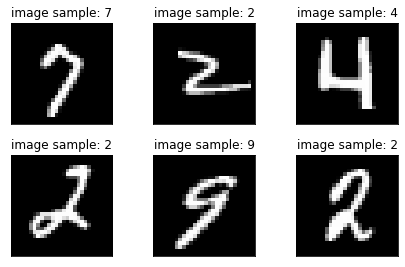

In [17]:
plot_image(x, y, 'image sample')

In [18]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [19]:
net = Net()

In [20]:
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

train_loss = []

In [21]:
for epoch in range(3):

    for batch_idx, (x, y) in enumerate(train_loader):
        x = x.view(x.size(0), 28 * 28)
        out = net(x)
        y_onehot = one_hot(y)
        loss = F.mse_loss(out, y_onehot)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

        train_loss.append(loss.item())

        if batch_idx % 10 == 0:
            print(epoch, batch_idx, loss.item())

0 0 0.10801881551742554
0 10 0.09369133412837982
0 20 0.08415411412715912
0 30 0.07818319648504257
0 40 0.07283611595630646
0 50 0.06837918609380722
0 60 0.06595614552497864
0 70 0.06056924909353256
0 80 0.058543313294649124
0 90 0.056111253798007965
0 100 0.052539341151714325
0 110 0.05168282985687256
1 0 0.049999482929706573
1 10 0.04659206047654152
1 20 0.046078603714704514
1 30 0.04657141491770744
1 40 0.04350840672850609
1 50 0.043829046189785004
1 60 0.041433122009038925
1 70 0.03957288712263107
1 80 0.042305778712034225
1 90 0.03878533095121384
1 100 0.03993149846792221
1 110 0.03880121558904648
2 0 0.03907236084342003
2 10 0.0385420136153698
2 20 0.03903255984187126
2 30 0.03864467144012451
2 40 0.03646867349743843
2 50 0.03527485206723213
2 60 0.03619829937815666
2 70 0.0355069562792778
2 80 0.03378644213080406
2 90 0.03426127880811691
2 100 0.03183062747120857
2 110 0.03310117498040199


In [22]:
total_correct = 0
for x, y in test_loader:
    x = x.view(x.size(0), 28 * 28)
    out = net(x)

    pred = out.argmax(dim=1)
    correct = pred.eq(y).sum().float().item()
    total_correct += correct

total_num = len(test_loader.dataset)
acc = total_correct / total_num
print('test acc:', acc)

test acc: 0.8897


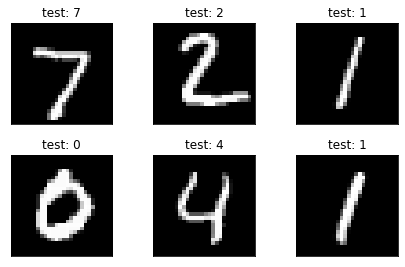

In [23]:
x, y = next(iter(test_loader))
out = net(x.view(x.size(0), 28 * 28))
pred = out.argmax(dim=1)
plot_image(x, pred, 'test')